## Final Project Submission

* Student names: Simon Lau, Manuel Klein
* Submission Date: 11/22/2019

# Kickstarter Project Success

**Task:**

In recent years, the range of funding options for projects created by individuals and small companies has expanded considerably. In addition to savings, bank loans, friends & family funding and other traditional options, crowdfunding has become a popular and readily available alternative. 

Kickstarter, founded in 2009, is one particularly well-known and popular crowdfunding platform. It has an all-or-nothing funding model, whereby a project is only funded if it meets its goal amount; otherwise no money is given by backers to a project.
A huge variety of factors contribute to the success or failure of a project — in general, and also on Kickstarter. Some of these are able to be quantified or categorized, which allows for the construction of a model to attempt to predict whether a project will succeed or not. The aim of this project is to construct such a model and also to analyse Kickstarter project data more generally, in order to help potential project creators assess whether or not Kickstarter is a good funding option for them, and what their chances of success are.


**Kickstarter Rules:**

https://www.kickstarter.com/rules?ref=global-footer

**Motivation:**

As a pledger you don't have a guarantee for getting a refund in case the fundraising goal is reached and nevertheless a project is not successful or a project is a scam.

https://www.kickstarter.com/terms-of-use#section4?ref=faq-basics_creatoroblig

https://help.kickstarter.com/hc/en-us/articles/115005048173-Can-Kickstarter-refund-the-money-if-a-project-is-unable-to-fulfill-

**Business cases:**

1. You want to croundfund your project and you are not sure if a croudfunding campaign on Kickstarter will be successful. We will find out how likely the success for your project is and tell you the most important influencing factors.


2. You want to pledge for a Kickstarter project but you are unsure if a specific project will be a success. We will find out how likely the success for the specific project is and tell you which factors influenced our estimation.


## Step 1: Importing Python libraries and dataset

In [24]:
#reset - fs # Resets the namespace by removing all names defined by the user

In [18]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict

In [19]:
# Importing the dataset
df_orig = pd.concat([pd.read_csv(f) for f in glob.glob('CSVs/Kickstarter*.csv')], ignore_index = True)

In [20]:
df = df_orig.copy()

In [21]:
#setting pandas display options to have more columns shown in .head() etc.
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 400)

## Step 2: Understanding the data

**Description of each column (RAW data):**

* backers_count - Number of people who contributed funds to the project
* blurb - Short description of the project
* category - Contains the category and sub-category of the project
* converted_pledged_amount - Amount of money pledged, converted to the currency in the 'current_currency' column
* country - Origin country of the project creator
* created_at - Date and time of when the project was initially created on Kickstarter (in Unix format)
* creator - Name of the project creator and other information about them, e.g. Kickstarter id number
* currency - Original currency the project goal was denominated in
* currency_symbol - Symbol of the original currency the project goal was denominated in
* currency_trailing_code - Code of the original currency the project goal was denominated in
* current_currency - Currency the project goal was converted to
* deadline - Date and time of when the project will close for donations (in Unix format)
* disable_communication - Whether or not a project owner disabled communication with their backers
* friends - Unclear (null or empty)
* fx_rate - Foreign exchange rate between the original currency and the current_currency
* goal - Funding goal
* id - ID number of the project
* is_backing - Unclear (null or false)
* is_starrable - Whether or not a project can be starred (i.e. liked and saved) by users
* is_starred - Whether or not a project has been starred (i.e. liked and saved) by users
* launched_at - Date and time of when the project was launched for funding (in Unix format)
* location - Contains the town or city of the project creator
* name - Name of the project
* permissions - Unclear (null or empty)
* photo - Contains a link and information to the project's photo/s
* pledged - Amount pledged in the current_currency
* profile - Details about the project's profile, including id number and various visual settings
* slug - Name of the project with hyphens instead of spaces
* source_url - URL for the project's category
* spotlight - After a project has been successful, it is spotlighted on the Kickstarter website
* staff_pick - Whether a project was highlighted as a staff_pick when it was launched/live
* state - Whether a project was successful, failed, canceled, suspending or still live
* state_changed_at - Date and time of when a project's status was changed (same as the deadline for successful and failed projects) (in Unix format)
* static_usd_rate - Conversion rate between the original currency and USD
* urls - URL to the project's page
* usd_pledged - Amount pledged in USD
* usd_type - Domestic or international


**Features to be removed:**

* friends - Does not contain any data
* is_backing - Does not contain any data
* permissions - Does not contain any data
* is_starred - Basically does not contain any data

Features identified as unimportant regarding success / non-success
* converted_pledged_amount
* currency
* currency_symbol
* currency_trailing_code
* current_currency
* fx_rate
* photo
* pledged
* slug
* source_url
* spotlight
* state_changed_at
* urls
* usd_type

In [67]:
df.head(3)

,backers_count,blurb,category,country,created_at,creator,deadline,disable_communication,id,is_starrable,launched_at,location,name,profile,staff_pick,state,static_usd_rate,usd_pledged,usd_goal
0,21,2006 was almost 7 years ago.... Can you believ...,"{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",US,1387659690,"{""id"":1495925645,""name"":""Daniel"",""is_registere...",1391899046,False,287514992,False,1388011046,"{""id"":2379574,""name"":""Chicago"",""slug"":""chicago...",New Final Round Album,"{""id"":822687,""project_id"":822687,""state"":""inac...",False,successful,1.0,802.0,200.0
1,97,An adorable fantasy enamel pin series of princ...,"{""id"":54,""name"":""Mixed Media"",""slug"":""art/mixe...",US,1549659768,"{""id"":1175589980,""name"":""Katherine"",""slug"":""fr...",1551801611,False,385129759,False,1550073611,"{""id"":2486340,""name"":""Sacramento"",""slug"":""sacr...",Princess Pals Enamel Pin Series,"{""id"":3665299,""project_id"":3665299,""state"":""in...",False,successful,1.0,2259.0,400.0
2,88,Helping a community come together to set the s...,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",US,1477242384,"{""id"":1196856269,""name"":""MelissaThomas"",""is_re...",1480607930,False,681033598,False,1478012330,"{""id"":2383660,""name"":""Columbus"",""slug"":""columb...",Their Life Through Their Lens-the Amish and Me...,"{""id"":2730508,""project_id"":2730508,""state"":""in...",True,successful,1.0,29638.0,27224.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 37 columns):
backers_count               209222 non-null int64
blurb                       209214 non-null object
category                    209222 non-null object
converted_pledged_amount    209222 non-null int64
country                     209222 non-null object
created_at                  209222 non-null int64
creator                     209222 non-null object
currency                    209222 non-null object
currency_symbol             209222 non-null object
currency_trailing_code      209222 non-null bool
current_currency            209222 non-null object
deadline                    209222 non-null int64
disable_communication       209222 non-null bool
friends                     300 non-null object
fx_rate                     209222 non-null float64
goal                        209222 non-null float64
id                          209222 non-null int64
is_backing                  300 

In [40]:
# No. of values in is_starred
df.is_starred.value_counts()

False    298
True       2
Name: is_starred, dtype: int64

In [59]:
# No. of values in is_starred
df.state.value_counts()

successful    117465
failed         75199
live            7311
suspended        623
Name: state, dtype: int64

In [60]:
# Reducing the 'state'-feature to a binary successful/failed variable
df = df.drop(df[df['state'] == 'canceled'].index, axis=0)
df = df.drop(df[df['state'] == 'live'].index, axis=0)
df = df.drop(df[df['state'] == 'suspended'].index, axis=0)

In [42]:
# Converting the 'goal' feature to 'usd_goal'
# Reducing all currency values to two decimal digits
df['usd_goal'] = round((df['goal']*df['static_usd_rate']), 2)
df['usd_pledged'] = round(df['usd_pledged'], 2)

In [70]:
#building two new columns for sub- and categories by reading them from the original category column
df['sub_category'] = df.apply(lambda x: x['category'].split('"slug":"')[1].split("/")[1].split('","position"')[0], axis=1)
df['category'] = df.apply(lambda x: x['category'].split('"slug":"')[1].split('",')[0].split("/")[0], axis=1)

In [72]:
df.category.value_counts()

music           25920
film & video    25653
technology      19476
art             19217
publishing      18690
food            14948
games           12452
fashion         10764
comics           8190
design           7680
photography      7390
crafts           6549
theater          6478
journalism       5338
dance            3919
Name: category, dtype: int64

In [107]:
df.category.groupby(df['state']).head(20)

0           music
1             art
2     photography
3         fashion
4      technology
5         fashion
6      publishing
7      technology
8             art
9           games
10    photography
11     publishing
12        fashion
13        fashion
14          games
15           food
16    photography
17    photography
18        theater
19            art
20          music
21          music
22           food
23     technology
24     publishing
25        theater
26        fashion
37           food
40     technology
41     technology
42           food
45           food
47           food
55           food
61        fashion
63           food
72            art
74     technology
78          games
81           food
Name: category, dtype: object

In [ ]:
df.sort_values(['category', 'state'], ascending=False).sum()

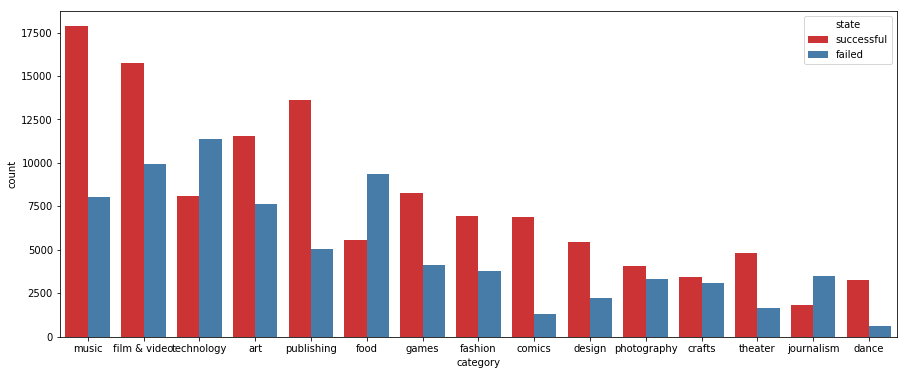

In [91]:
'''countplot with hues'''
plt.figure(figsize = (15,6))
sns.countplot(x=df['category'], hue=df['state'], palette = 'Set1', order = df['category'].value_counts().index)

In [22]:
#get creator account name 
df['creator_acc'] = df.apply(lambda x: x['creator'].split('"name":"')[1].split('","')[0], axis=1)

In [26]:
df.duplicated(subset="creator_acc").value_counts()

False    150701
True      58521
dtype: int64

In [23]:
df.head(3)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,creator_acc
0,315,Babalus Shoes,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",28645,US,1541459205,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...",USD,$,True,USD,1552539775,False,NaN,1.0,28000.0,2108505034,NaN,False,NaN,1548223375,"{""id"":2462429,""name"":""Novato"",""slug"":""novato-c...",Babalus Children's Shoes,NaN,"{""key"":""assets/023/667/205/a565fde5382d6b53276...",28645.0,"{""id"":3508024,""project_id"":3508024,""state"":""in...",babalus-childrens-shoes,https://www.kickstarter.com/discover/categorie...,False,False,live,1548223375,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",28645.0,international,Lucy Conroy
1,47,A colorful Dia de los Muertos themed oracle de...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",1950,US,1501684093,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,USD,1504976459,False,NaN,1.0,1000.0,928751314,NaN,False,NaN,1502384459,"{""id"":2400549,""name"":""Euless"",""slug"":""euless-t...",The Ofrenda Oracle Deck,NaN,"{""key"":""assets/017/766/989/dd9f18c773a8546d996...",1950.0,"{""id"":3094785,""project_id"":3094785,""state"":""ac...",the-ofrenda-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1950.0,domestic,Lisa Vollrath
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...","{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",22404,US,1348987533,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,USD,1371013395,False,NaN,1.0,15000.0,928014092,NaN,False,NaN,1368421395,"{""id"":2423474,""name"":""Hollywood"",""slug"":""holly...","Record Electra's Debut Album (Pop, Rock, Class...",NaN,"{""key"":""assets/011/433/681/489fd66f7861fefd8c8...",22404.0,"{""id"":359847,""project_id"":359847,""state"":""inac...",record-electras-debut-album-pop-rock-classical,https://www.kickstarter.com/discover/categorie...,True,False,successful,1371013395,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",22404.0,international,Electra


In [45]:
# Data Cleaning
drop_list = ["friends", "is_backing", "is_starred", "permissions", "converted_pledged_amount", "goal", 
             "currency", "currency_symbol", "currency_trailing_code", "current_currency", "fx_rate", 
             "photo", "pledged", "slug", "source_url", "spotlight", "state_changed_at", "urls", "usd_type"]
df.drop(columns=drop_list, inplace=True)

In [68]:
# Converting dates from unix to datetime
df_date_columns = ['created_at', 'deadline', 'launched_at']
for i in df_date_columns:
    df[i] = pd.to_datetime(df[i], origin='unix', unit='s')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192664 entries, 0 to 209221
Data columns (total 19 columns):
backers_count            192664 non-null int64
blurb                    192662 non-null object
category                 192664 non-null object
country                  192664 non-null object
created_at               192664 non-null datetime64[ns]
creator                  192664 non-null object
deadline                 192664 non-null datetime64[ns]
disable_communication    192664 non-null bool
id                       192664 non-null int64
is_starrable             192664 non-null bool
launched_at              192664 non-null datetime64[ns]
location                 192449 non-null object
name                     192664 non-null object
profile                  192664 non-null object
staff_pick               192664 non-null bool
state                    192664 non-null object
static_usd_rate          192664 non-null float64
usd_pledged              192664 non-null float64
usd_goa

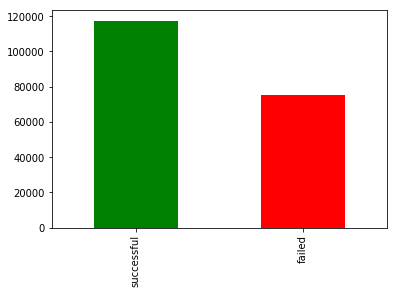

In [65]:
df.state.value_counts().plot(kind='bar', color=['green', 'red']);

In [ ]:
#test